In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV        
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score,confusion_matrix, ConfusionMatrixDisplay,accuracy_score, classification_report, precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

seed = 42
np.random.seed(42)
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)  


In [19]:
data_dir = r'C:\Users\Amzad\Desktop\resume_classification\notebooks\data\data(V-0.1).csv'
data=pd.read_csv(data_dir)
data.head()

,resume,category
0,hr administratormarket associ hr administr sum...,HR
1,"hr specialist , us hr oper summari versatil me...",HR
2,"hr director summari year experi recruit , plus...",HR
3,"hr specialist summari dedic , driven , dynam y...",HR
4,hr manag skill highlight hr skill hr depart st...,HR


In [20]:
input=data['resume']
output=data[['category']] 

# one hot encoding of output 
one_enc = OneHotEncoder() 
output1 = one_enc.fit_transform(output).toarray()

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

# vectorize input
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
x_train = vectorizer.fit_transform(x_train.values.astype('str')).toarray()

# train random forest classifier 
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(x_train, y_train)



c:\Users\Amzad\Desktop\resume_classification\venv\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=1000, random_state=0)

In [21]:
X_test = vectorizer.transform(x_test)
y_pred = classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred, average='macro'))

Accuracy: 0.6800804828973843
Precision: 0.6264784492797043


c:\Users\Amzad\Desktop\resume_classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


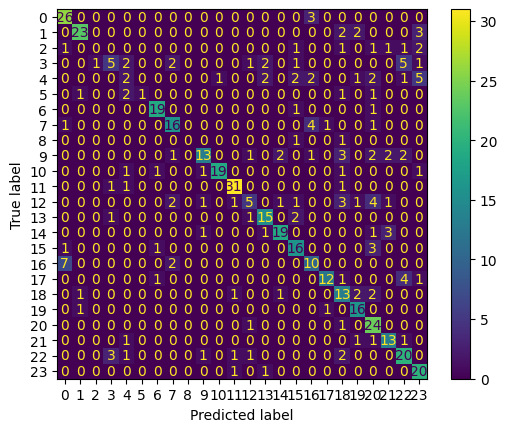

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [26]:
#k fold cross validation 
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores)

c:\Users\Amzad\Desktop\resume_classification\venv\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Amzad\Desktop\resume_classification\venv\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Amzad\Desktop\resume_classification\venv\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Amzad\Desktop\resume_classification\venv\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column

[0.58291457 0.53266332 0.52261307 0.56281407 0.56281407 0.49748744
 0.54773869 0.56565657 0.52020202 0.56565657]


In [24]:
# cross validation for train data
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
scores = cross_val_score(clf, x_train, y_train, cv=kfold , scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.45 (+/- 0.06)


In [33]:
#gradian boosting classifier 
from sklearn.ensemble import GradientBoostingClassifier
#train model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(x_train, y_train)

c:\Users\Amzad\Desktop\resume_classification\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

0.6800804828973843


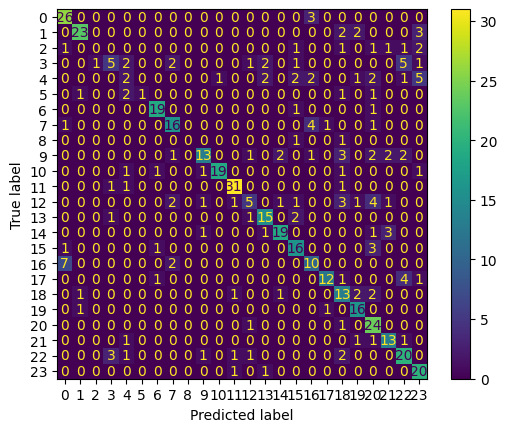

In [38]:
print(accuracy_score(y_test, y_pred))
cm =confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [41]:
print("Precision:",precision_score(y_test, y_pred, average='macro'))

Precision: 0.6264784492797043


c:\Users\Amzad\Desktop\resume_classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_test = vectorizer.transform(x_test)
X_test[11].shape

In [58]:
test_pred= classifier.predict(X_test[11])
print(test_pred)

['HEALTHCARE']


In [56]:
#save model 
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))


In [59]:
# #load model
# model = pickle.load(open('finalized_model.sav', 'rb'))
# #predict 
# y_pred = model.predict(X_test[60])
# print(y_pred)

['FITNESS']


In [52]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB




In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std()) 

In [54]:
from sklearn import svm
clf= OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
clf.fit(x_train, y_train)



OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True))